### The `alpha` parameter in `geom_imshow()`


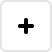
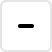
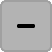
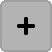
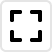
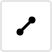
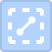
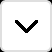
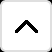
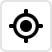

In [1]:
import numpy as np
from lets_plot import *

LetsPlot.setup_html()

In [2]:
# Load an image

from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')

image = Image.open(BytesIO(response.content))
im_arr = np.asarray(image)
im_arr.shape


(225, 225, 3)

In [3]:
p = ggplot() + geom_point(x=112, y=112, color="black", size=100, shape=15) + ggsize(450, 450)
p + ggtitle("The background black square") + ggsize(400, 300)

#### 1. `alpha` parameter and color image

Normalization: 1.0013580322265625e-05
Clipping: 0.00046896934509277344
image_2d: 0.0005178451538085938
png.Writer: 0.00449824333190918
base64: 0.0003256797790527344
Normalization: 0.0006568431854248047
Clipping: 0.00028896331787109375
image_2d: 0.0004169940948486328
png.Writer: 0.006751060485839844
base64: 0.0003578662872314453



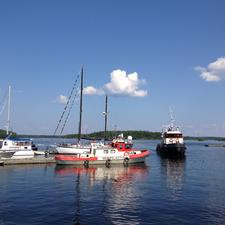
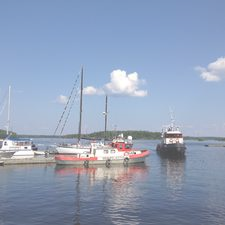

In [4]:
pair1 = GGBunch()
pair1.add_plot(p + geom_imshow(im_arr) + ggtitle("no alpha (opaque image)"), 0, 0)
pair1.add_plot(p + geom_imshow(im_arr, alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair1

#### 2. `alpha` parameter and grayscale image

In [5]:
im_arr_gs = im_arr[:,:,0]
im_arr_gs.shape

(225, 225)

Normalization: 0.0009360313415527344
Clipping: 0.0002238750457763672
image_2d: 0.00019812583923339844
png.Writer: 0.002608060836791992
base64: 0.00012373924255371094
Normalization: 0.0010318756103515625
Clipping: 0.0004050731658935547
image_2d: 0.00021195411682128906
png.Writer: 0.003968954086303711
base64: 0.00012421607971191406



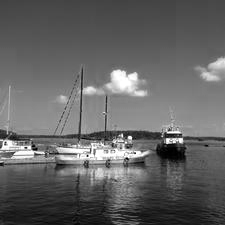
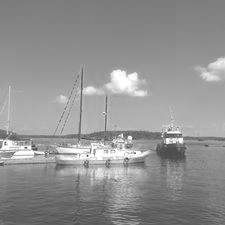

In [6]:
pair2 = GGBunch()
pair2.add_plot(p + geom_imshow(im_arr_gs) + ggtitle("no alpha (opaque image)"), 0, 0)
pair2.add_plot(p + geom_imshow(im_arr_gs, alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair2

#### 3. `alpha` parameter and pseudo-color image

Normalization: 0.001689910888671875
Clipping: 0.0003859996795654297
image_2d: 0.00013494491577148438
png.Writer: 0.006419181823730469
base64: 0.00010275840759277344
Normalization: 0.0015461444854736328
Clipping: 0.0002999305725097656
image_2d: 0.0001087188720703125
png.Writer: 0.006821155548095703
base64: 0.00014710426330566406



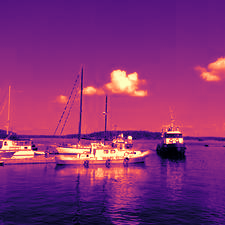
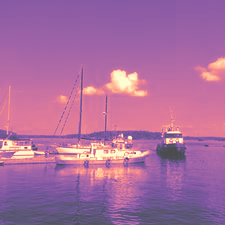

In [7]:
pair3 = GGBunch()
pair3.add_plot(p + geom_imshow(im_arr_gs, "magma") + ggtitle("no alpha (opaque image)"), 0, 0)
pair3.add_plot(p + geom_imshow(im_arr_gs, "magma", alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair3

#### 4. `alpha` parameter and grayscale image with transparent pixels (`NaN` values)

In [8]:
im_arr_gs_nan=im_arr_gs.copy()
im_arr_gs_nan=im_arr_gs_nan.astype(np.float64)
im_arr_gs_nan[im_arr_gs_nan < 80] = np.nan

Normalization: 0.0014908313751220703
Clipping: 0.00026535987854003906
image_2d: 6.985664367675781e-05
png.Writer: 0.007205009460449219
base64: 0.0001239776611328125
Normalization: 0.0014312267303466797
Clipping: 0.00026106834411621094
image_2d: 0.00016164779663085938
png.Writer: 0.007109165191650391
base64: 0.0001239776611328125



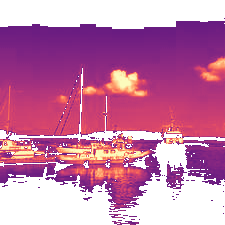
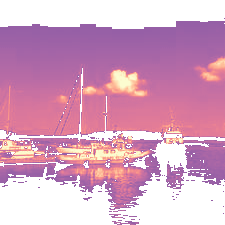

In [9]:
pair4 = GGBunch()
pair4.add_plot(p + geom_imshow(im_arr_gs_nan, "magma", norm=False) + ggtitle("no alpha (opaque image)"), 0, 0)
pair4.add_plot(p + geom_imshow(im_arr_gs_nan, "magma", norm=False, alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair4